In [ ]:
Dataset URL:

https://www.kaggle.com/datasets/salader/dogs-vs-cats


cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 43.1MB/s]
100% 1.06G/1.06G [00:28<00:00, 39.8MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Conv3D,BatchNormalization,Dropout

In [7]:
train_ds=keras.utils.image_dataset_from_directory(directory='/content/train',
                                         labels='inferred',
                                         label_mode='int',
                                         image_size=(256,256),
                                         batch_size=32)
validation_ds=keras.utils.image_dataset_from_directory(directory='/content/test',
                                         labels='inferred',
                                         label_mode='int',
                                         image_size=(256,256),
                                         batch_size=32)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# normalize

In [9]:
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32,kernel_size= (3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size= (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size= (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

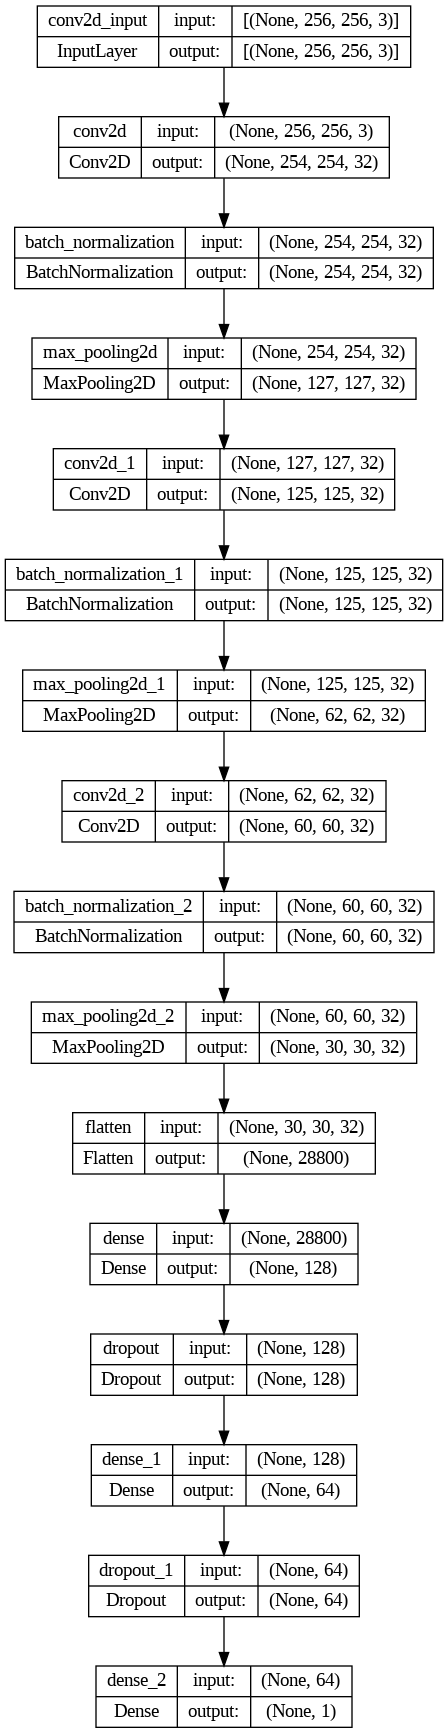

In [36]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [13]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [15]:
###### you can change the value of no of epochs to increase the accuracy of model
history=model.fit(train_ds,epochs=1,validation_data=validation_ds) ##

625/625 [==============================] - 56s 88ms/step - loss: 0.6077 - accuracy: 0.6720 - val_loss: 0.5483 - val_accuracy: 0.7332


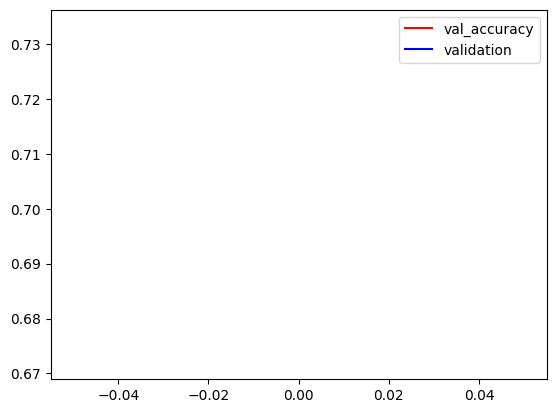

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='val_accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

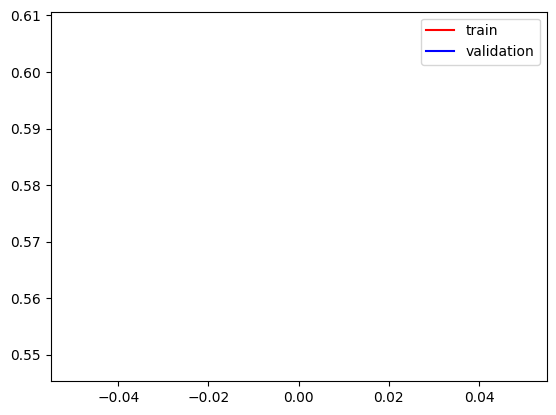

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [19]:
test_img = cv2.imread('/content/test/dogs/dog.10067.jpg')


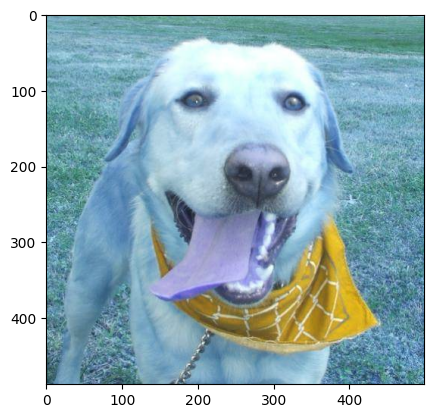

In [20]:
plt.imshow(test_img)


In [21]:
test_img.shape

(488, 499, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input= test_img.reshape((1,256,256,3))

In [24]:
output=model.predict(test_input)

1/1 [==============================] - 0s 346ms/step


In [25]:
if output[0][0] > 0.5:
  print('dog')
else:
  print('cat')

dog


In [26]:
test2_img = cv2.imread('/content/test/cats/cat.10000.jpg')


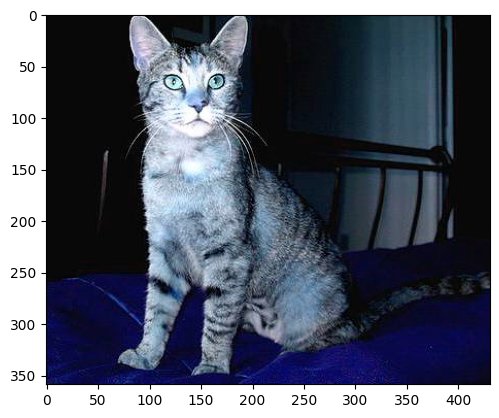

In [27]:
plt.imshow(test2_img)


In [28]:
test2_img.shape

(359, 431, 3)

In [29]:
test2_img = cv2.resize(test2_img,(256,256))

In [30]:
test2_input= test2_img.reshape((1,256,256,3))

In [31]:
output2=model.predict(test2_input)

1/1 [==============================] - 0s 22ms/step


In [32]:
if output2[0][0]<0.5:
  print('cat')
else:
  print('dog')

dog


In [33]:
output2

array([[1.]], dtype=float32)